In [84]:
import mglearn
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
iris_dataset = load_iris()

# Iris Classifation

### Features

In [85]:
for feature in iris_dataset['feature_names']:
    print(feature)


sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)


### Target
The species of the flower.

**Possible classes (species of flower)**:

In [86]:
for target in iris_dataset['target_names']:
    print(target)

setosa
versicolor
virginica


### Size of Data Set

In [87]:
print('Number of samples = {}'.format(iris_dataset['data'].shape[0]))

Number of samples = 150


### Splitting Data Set Into Testing and Training Set
75% percent of the samples will go in the testing set and 25% in the training set.

### Building K-Neightbors Model 
*Choice: n_neighbors = 1 (test sample is assigned the same label as the label of the point in the dataset nearest to it)

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris_dataset['data'],
                                                 iris_dataset['target'],
                                                random_state=0)

Iris Pair Plot


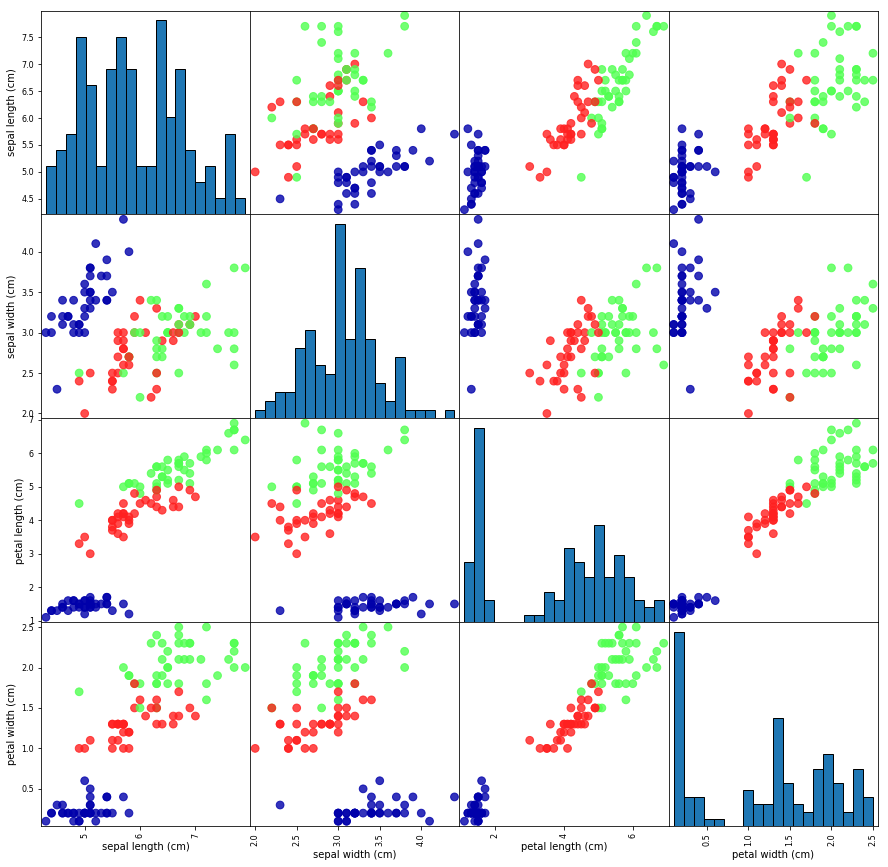

In [89]:
iris_dataframe = pd.DataFrame(X_train,columns=iris_dataset.feature_names)
print('Iris Pair Plot')

pd.scatter_matrix(iris_dataframe,c=y_train,
                       figsize=(15,15),marker='o',
                       hist_kwds={'bins':20,'edgecolor':'black'},
                       s=60,alpha=.8,cmap=mglearn.cm3);

### Testing the Model

In [90]:
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


print('Test set score: {:.2f}'.format(model.score(X_test,y_test)))

Test set score: 0.97


**Testing the model for different random training-test splits**

Since there are 38 testing samples, possible model scores are:

In [91]:
n=0
while n < 39:
    score = 38-n
    percent = round((score/38)*100,2)
    print(str(percent)+'%')
    n+=1

100.0%
97.37%
94.74%
92.11%
89.47%
86.84%
84.21%
81.58%
78.95%
76.32%
73.68%
71.05%
68.42%
65.79%
63.16%
60.53%
57.89%
55.26%
52.63%
50.0%
47.37%
44.74%
42.11%
39.47%
36.84%
34.21%
31.58%
28.95%
26.32%
23.68%
21.05%
18.42%
15.79%
13.16%
10.53%
7.89%
5.26%
2.63%
0.0%


In [92]:
n = 0

scores = []
while n < 1000:
    X_train,X_test,y_train,y_test = train_test_split(iris_dataset['data'],
                                                 iris_dataset['target'],
                                                random_state=n)
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    scores.append(model.score(X_test,y_test))
    n+=1
scores = np.array(scores)
print('Number of Tests = {}'.format(len(scores)))
print('Average score = {}'.format(scores.mean()))
print('Median score = {}'.format(np.median(scores)))
print('Highest Score = {}'.format(scores.max()))
print('Lowest Score = {}'.format(scores.min()))

Number of Tests = 1000
Average score = 0.9565
Median score = 0.9473684210526315
Highest Score = 1.0
Lowest Score = 0.868421052631579


In [68]:
from scipy.stats import itemfreq
freq = itemfreq(scores)
freq[:,0]

array([ 0.86842105,  0.89473684,  0.92105263,  0.94736842,  0.97368421,  1.        ])

There were only six different scores in the 1000 tests. The most frequent score was .97.

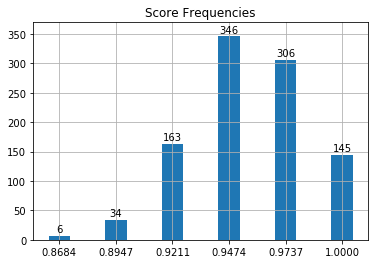

In [77]:
fig, ax = plt.subplots()

ax.set_title('Score Frequencies')
ax.set_ylim(0,370)
ax.grid()
rects1 = ax.bar(freq[:,0],freq[:,1],width=.01) #set the bin count at 12. Only six bins actually 
                          #values, since there were only 6 unique scores
ax.set_xticks(freq[:,0]);
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3+height,
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(rects1)